In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Порог длительности - медиана, 211306.0 мс.
Коротких песен: 9419
Длинных песен: 9416


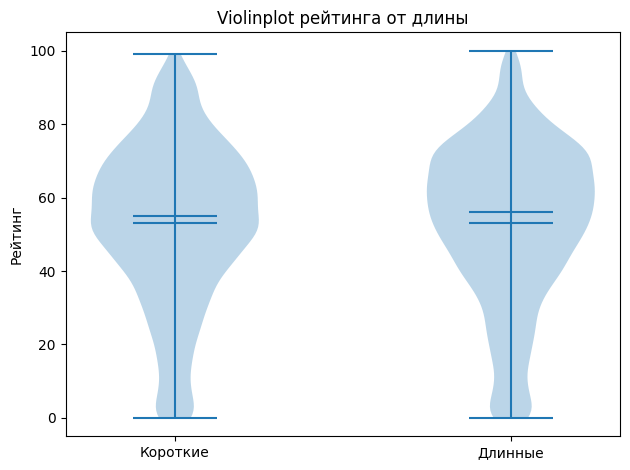

In [89]:
df = pd.read_csv("song_data.csv")

rating = "song_popularity"
duration = "song_duration_ms" 

T = df[duration].median()
print(f"Порог длительности - медиана, {T} мс.")

short = df[df[duration] <= T][rating]
long = df[df[duration] > T][rating]

print("Коротких песен:", len(short))
print("Длинных песен:", len(long))

fig, ax = plt.subplots()

parts = ax.violinplot(
    [short, long],
    showmeans=True,
    showmedians=True
)

ax.set_xticks([1, 2])
ax.set_xticklabels(["Короткие", "Длинные"])
ax.set_ylabel("Рейтинг")
ax.set_title("Violinplot рейтинга от длины")

plt.tight_layout()
plt.show()


Сделаем Тест Смирнова.

$H_0$ -- Распределения у коротких и длинных пересен совпадают.
$H_1$ -- отрицание $H_0$.

In [90]:
x = np.sort(short.to_numpy())
y = np.sort(long.to_numpy())

n1 = x.size
n2 = y.size

values = np.sort(np.concatenate([x, y]))

Fn = np.searchsorted(x, values, side="right") / n1
Gm = np.searchsorted(y, values, side="right") / n2

D = np.max(np.abs(Fn - Gm))
T = np.sqrt(n1 * n2 / (n1 + n2)) * D

print("D =", D)
print("T =", T)

alpha = 0.05
c_alpha = 1.36

T_crit = c_alpha
D_crit = c_alpha * math.sqrt((n1 + n2) / (n1 * n2))

print(f"T_crit (alpha={alpha}) = {T_crit:.4f}")
print(f"D_crit (alpha={alpha}) = {D_crit:.6f}")


def kolmogorov_pvalue(T):
    s = 0.0
    for k in range(1, 100):
        term = (-1) ** (k - 1) * math.exp(-2 * (k ** 2) * (T ** 2))
        s += term
    return 2 * s


p_value = kolmogorov_pvalue(T)
print(f"p-value ≈ {p_value:.6f}")

D = 0.02331431082151686
T = 1.599835734781475
T_crit (alpha=0.05) = 1.3600
D_crit (alpha=0.05) = 0.019819
p-value ≈ 0.011965


Получилось $T>T_{crit}$ и $0.012 = p$-value $< \alpha = 0.05$, значит, гипотеза $H_0$ отвергается.

In [91]:
from scipy.stats import mannwhitneyu
 
alpha = 0.05

u_stat, p_value_u = mannwhitneyu(short, long, alternative="two-sided")

print(f"U = {u_stat}")
print(f"p-value = {p_value_u:.4f}")


U = 43843865.0
p-value = 0.1795


Получилось $0.1795 = p$-value $\geq \alpha = 0.05$, значит, по критерию Манна-Уитни $H_0$ не отвергается.